# Investigate the correlation between features and diabetes

In [11]:
# !pip install seaborn

     |████████████████████████████████| 292 kB 845 kB/s eta 0:00:01


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
# dbt_data = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')
dbt_data = pd.read_csv('./diabetes_binary.csv')
# Print the first 5 rows of the dataframe.
print(dbt_data.head())

   Diabetes_01  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            0       0         0          1   22       1       0   
1            0       0         0          1   17       1       0   
2            0       0         0          1   25       1       0   
3            0       0         0          1   26       1       0   
4            0       0         1          1   34       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       1  ...              1   
1                     0             1       1  ...              1   
2                     0             0       1  ...              1   
3                     1             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        1         4         0         0    0    6          6   
1            0      

# Smoker - Diabetes

In [3]:
#group diabetes status & Smokers
diabetes_Smokers = dbt_data.groupby(['Diabetes_01', 'Smoker']).size().reset_index(name = 'Count')
print(diabetes_Smokers)

   Diabetes_01  Smoker  Count
0            0       0  43407
1            0       1  33986
2            1       0  37002
3            1       1  40391


In [4]:
Total_Stat = diabetes_Smokers.groupby(['Diabetes_01']).sum().Count
Total_Stat

Diabetes_01
0    77393
1    77393
Name: Count, dtype: int64

In [5]:
Temp = diabetes_Smokers.set_index('Diabetes_01').join(Total_Stat,rsuffix='_')
Temp['Percentage'] = Temp['Count']/Temp['Count_']
Temp = Temp.reset_index()
Temp

,Diabetes_01,Smoker,Count,Count_,Percentage
0,0,0,43407,77393,0.560865
1,0,1,33986,77393,0.439135
2,1,0,37002,77393,0.478105
3,1,1,40391,77393,0.521895


In [6]:
Temp['Diabetes_01'] = Temp['Diabetes_01'].replace({0:'Healthy', 1:'Diabetic'})
Temp['Smoker'] = Temp['Smoker'].replace({0:'Non-Smoker', 1:'Smoker'})

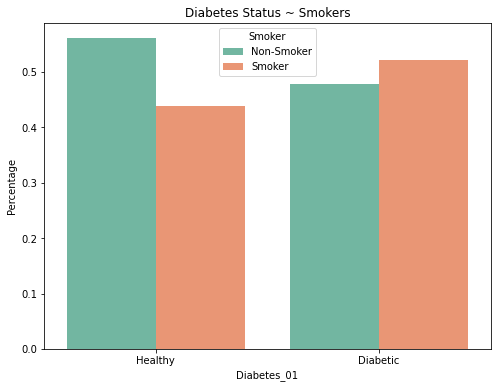

In [7]:
#visualize diabetes status ~ Smokers
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_01', y = 'Percentage', hue = 'Smoker', data = Temp, palette = 'Set2')
plt.title("Diabetes Status ~ Smokers")
plt.show()
# from the distribution can see smoke is obviously impact diabetes result, smoker with diabetes > smoker without diabetes

# Mental Health - Diabetes

In [8]:
diabetes_Mental_temp = dbt_data['MentHlth']
dbt_data.loc[diabetes_Mental_temp < 6,'MentHlth_group'] = '0-5'
dbt_data.loc[((diabetes_Mental_temp >= 6) & (diabetes_Mental_temp <= 24)),'MentHlth_group'] = '6-24'
dbt_data.loc[((diabetes_Mental_temp > 24) & (diabetes_Mental_temp <= 30)),'MentHlth_group'] = '25-30'
dbt_data

,Diabetes_01,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_group
0,0,0,0,1,22,1,0,0,1,1,...,0,1,4,0,0,0,6,6,8,0-5
1,0,0,0,1,17,1,0,0,1,1,...,0,1,0,2,0,0,9,6,8,0-5
2,0,0,0,1,25,1,0,0,0,1,...,0,4,30,4,0,1,5,6,8,25-30
3,0,0,0,1,26,1,0,1,1,1,...,0,3,0,0,0,1,13,5,7,0-5
4,0,0,1,1,34,0,0,0,1,1,...,0,3,0,1,0,0,10,5,4,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154781,1,1,1,1,32,1,0,0,0,0,...,0,5,30,30,1,0,11,3,1,25-30
154782,1,1,0,1,30,1,1,0,0,1,...,0,4,4,15,1,0,10,2,2,0-5
154783,1,1,1,1,23,0,0,0,0,0,...,0,4,0,0,0,0,11,4,2,0-5
154784,1,0,1,1,25,0,0,0,0,0,...,0,3,30,0,0,0,10,5,1,25-30


In [9]:
#group diabetes status & Mental Health
diabetes_Mental = dbt_data.groupby(['Diabetes_01', 'MentHlth_group']).size().reset_index(name = 'Count')
print(diabetes_Mental)

# Check the missing values in the dataset
dbt_data.isnull().values.any()

   Diabetes_01 MentHlth_group  Count
0            0            0-5  67023
1            0          25-30   3815
2            0           6-24   6555
3            1            0-5  62085
4            1          25-30   6912
5            1           6-24   8396


False

In [10]:
#calculating percentage
Total_Stat_Mnth = diabetes_Mental.groupby(['Diabetes_01']).sum()
Total_Stat_Mnth

,Count
Diabetes_01,
0,77393
1,77393


In [11]:
Temp1 = diabetes_Mental.set_index('Diabetes_01').join(Total_Stat_Mnth,rsuffix='_')
Temp1['Percentage'] = Temp1['Count']/Temp1['Count_']
Temp1
Temp1 = Temp1.reset_index()

In [12]:
Temp1['Diabetes_01'] = Temp1['Diabetes_01'].replace({0.0:'Healthy', 1.0:'Diabetic'})
Temp1['MentHlth_group'] = Temp1['MentHlth_group'].replace({'0-5':'Not so sad','6-24':'Sad','25-30':'Very sad'})

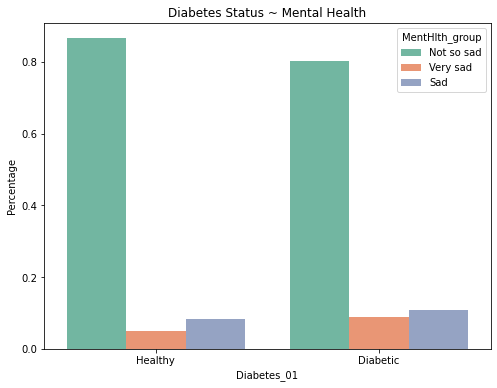

In [13]:
#visualize diabetes status ~ MentHllth
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_01', y = 'Percentage', hue = 'MentHlth_group', data = Temp1, palette = 'Set2')
plt.title("Diabetes Status ~ Mental Health")
plt.show()
# The distribution is similar for non-diabetic and diabetic,mental heath do has some influlence on 
# diabetes, but the influence is not that big as physical health

# Physical Health - Diabetes

In [14]:
diabetes_Phys_temp = dbt_data['PhysHlth']
dbt_data.loc[diabetes_Phys_temp < 6,'PhysHlth_group'] = '0-5'
dbt_data.loc[((diabetes_Phys_temp >= 6) & (diabetes_Phys_temp <= 24)),'PhysHlth_group'] = '6-24'
dbt_data.loc[((diabetes_Phys_temp > 24) & (diabetes_Phys_temp <= 30)),'PhysHlth_group'] = '25-30'

In [15]:
#group diabetes status & Physical Health
diabetes_Phys = dbt_data.groupby(['Diabetes_01', 'PhysHlth_group']).size().reset_index(name = 'Count')
print(diabetes_Phys)

# Check the missing values in the dataset
dbt_data.isnull().values.any()

   Diabetes_01 PhysHlth_group  Count
0            0            0-5  64891
1            0          25-30   5514
2            0           6-24   6988
3            1            0-5  50740
4            1          25-30  14139
5            1           6-24  12514


False

In [16]:
#calculating percentage
Total_Stat_Phys = diabetes_Phys.groupby(['Diabetes_01']).sum()
Total_Stat_Phys

,Count
Diabetes_01,
0,77393
1,77393


In [17]:
Temp1 = diabetes_Phys.set_index('Diabetes_01').join(Total_Stat_Phys,rsuffix='_')
Temp1['Percentage'] = Temp1['Count']/Temp1['Count_']
Temp1
Temp1 = Temp1.reset_index()

In [18]:
Temp1['Diabetes_01'] = Temp1['Diabetes_01'].replace({0:'Healthy', 1:'Diabetic'})
Temp1['PhysHlth_group'] = Temp1['PhysHlth_group'].replace({'0-5':'OK','6-24':'Not That OK','25-30':'Bad'})

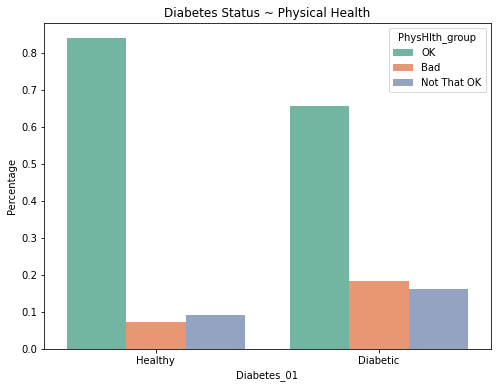

In [19]:
#visualize diabetes status ~ PhysHlth
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_01', y = 'Percentage', hue = 'PhysHlth_group', data = Temp1, palette = 'Set2')
plt.title("Diabetes Status ~ Physical Health")
plt.show()
# Obviously people have physical health problem have more risk of diabetes

# Compare the influence to Dabetes between Mental health and Physical Health

In [20]:
# From below data, we can see both Mental health and Physical Health has influence on Diabetes.
# But 8.055754-3.687814=3.585996 > 4.469758-2.975760=1.493998
# so the influnce of Phisical health > influence of Mental health
diabetes_MentHlth_PhysHlth = dbt_data.groupby(['Diabetes_01'])['MentHlth','PhysHlth'].describe()
print(diabetes_MentHlth_PhysHlth)

            MentHlth                                               PhysHlth  \
               count      mean       std  min  25%  50%  75%   max    count   
Diabetes_01                                                                   
0            77393.0  2.975760  7.115810  0.0  0.0  0.0  2.0  30.0  77393.0   
1            77393.0  4.469758  8.959883  0.0  0.0  0.0  3.0  30.0  77393.0   

                                                             
                 mean        std  min  25%  50%   75%   max  
Diabetes_01                                                  
0            3.687814   8.119934  0.0  0.0  0.0   2.0  30.0  
1            8.055754  11.342865  0.0  0.0  1.0  15.0  30.0  


/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [21]:
# from IPython.core.display import display, HTML

In [22]:
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Split to two datasets - Non-diabetic dataset and Diabetic dataset

In [23]:
dbt_data.groupby(['Diabetes_01']).size()

Diabetes_01
0    77393
1    77393
dtype: int64

In [24]:
# split out the data without diabetes
is1 = dbt_data['Diabetes_01'] == 0
dbt_data0 = dbt_data[is1]
dbt_data0

,Diabetes_01,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_group,PhysHlth_group
0,0,0,0,1,22,1,0,0,1,1,...,1,4,0,0,0,6,6,8,0-5,0-5
1,0,0,0,1,17,1,0,0,1,1,...,1,0,2,0,0,9,6,8,0-5,0-5
2,0,0,0,1,25,1,0,0,0,1,...,4,30,4,0,1,5,6,8,25-30,0-5
3,0,0,0,1,26,1,0,1,1,1,...,3,0,0,0,1,13,5,7,0-5,0-5
4,0,0,1,1,34,0,0,0,1,1,...,3,0,1,0,0,10,5,4,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,0,0,0,1,22,0,0,0,1,1,...,1,2,0,0,0,9,6,8,0-5,0-5
77389,0,0,1,1,50,0,0,0,0,0,...,4,0,0,0,1,5,4,6,0-5,0-5
77390,0,0,1,1,29,1,0,0,1,1,...,3,0,0,0,0,10,4,7,0-5,0-5
77391,0,1,1,1,23,0,0,0,1,1,...,2,0,0,0,0,11,6,8,0-5,0-5


In [25]:
# split out the data with diabetes
is2 = dbt_data['Diabetes_01'] == 1
dbt_data1 = dbt_data[is2]
dbt_data1

,Diabetes_01,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth_group,PhysHlth_group
77393,1,1,1,1,30,1,0,1,0,1,...,5,30,30,1,0,9,5,1,25-30,25-30
77394,1,0,0,1,25,1,0,0,1,1,...,3,0,0,0,1,13,6,8,0-5,0-5
77395,1,1,1,1,28,0,0,0,0,0,...,4,0,0,1,0,11,4,6,0-5,0-5
77396,1,0,0,1,23,1,0,0,1,0,...,2,0,0,0,1,7,5,6,0-5,0-5
77397,1,1,0,1,27,0,0,0,1,1,...,1,0,0,0,0,13,5,4,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154781,1,1,1,1,32,1,0,0,0,0,...,5,30,30,1,0,11,3,1,25-30,25-30
154782,1,1,0,1,30,1,1,0,0,1,...,4,4,15,1,0,10,2,2,0-5,6-24
154783,1,1,1,1,23,0,0,0,0,0,...,4,0,0,0,0,11,4,2,0-5,0-5
154784,1,0,1,1,25,0,0,0,0,0,...,3,30,0,0,0,10,5,1,25-30,0-5


In [26]:
pd.set_option('display.max_rows', None)

# BMI - Diabetes

In [69]:
# Distribution of BMI for people with no diabetes
diabetes_BMI0 = dbt_data0.groupby(['BMI']).size().reset_index(name = 'Count')
print(diabetes_BMI0)

    BMI  Count
0    12      2
1    13      6
2    14     20
3    15     44
4    16    118
5    17    266
6    18    674
7    19   1350
8    20   2249
9    21   3312
10   22   4639
11   23   5313
12   24   6582
13   25   5599
14   26   6549
15   27   7785
16   28   5011
17   29   4397
18   30   4326
19   31   3564
20   32   2926
21   33   2415
22   34   2006
23   35   1395
24   36   1194
25   37   1028
26   38    861
27   39    713
28   40    508
29   41    419
30   42    364
31   43    360
32   44    231
33   45    188
34   46    166
35   47    152
36   48    101
37   49     75
38   50     80
39   51     60
40   52     45
41   53     40
42   54     20
43   55     37
44   56     21
45   57     17
46   58     17
47   59     12
48   60      7
49   61      3
50   62     10
51   63      7
52   64      3
53   65      5
54   66      1
55   67      1
56   68      2
57   69      3
58   70      4
59   71      4
60   72      2
61   73      7
62   74      3
63   75      8
64   76      1
65   77   

/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


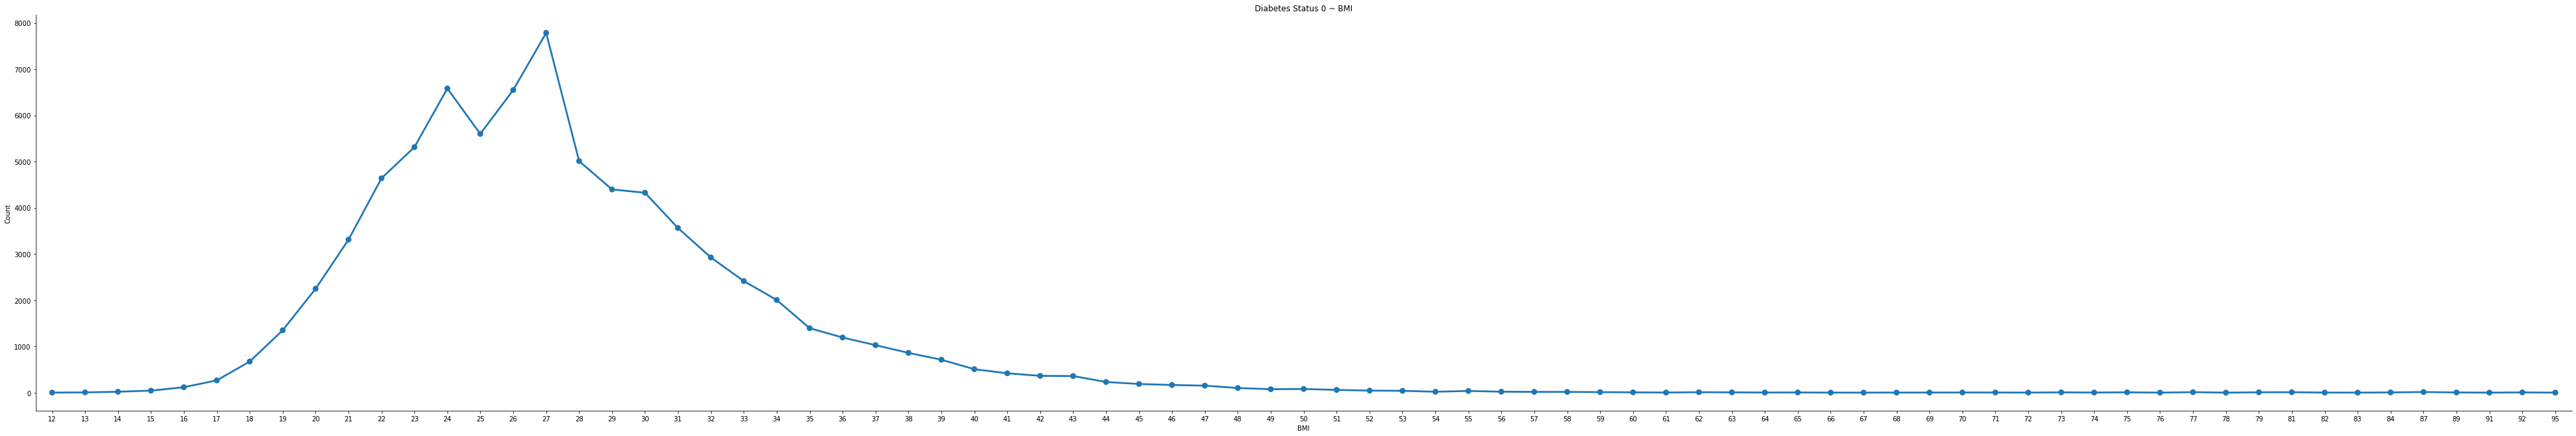

In [59]:
# plt.figure(figsize = (12,5),dpi=300)
# plt.rcParams['figure.figsize'] = [16, 6] 
sns.factorplot(x = 'BMI', y = 'Count' ,data = diabetes_BMI0,height=9,aspect=6)
plt.title("Diabetes Status 0 ~ BMI")
plt.show()

In [67]:
# Distribution of BMI for people with diabetes
diabetes_BMI1 = dbt_data1.groupby(['BMI']).size().reset_index(name = 'Count_')
print(diabetes_BMI1)

    BMI  Count_
0    13       7
1    14      18
2    15      32
3    16      46
4    17     115
5    18     191
6    19     351
7    20     604
8    21     994
9    22    1583
10   23    2100
11   24    3225
12   25    3201
13   26    4457
14   27    5965
15   28    4821
16   29    4891
17   30    5101
18   31    4785
19   32    4625
20   33    4301
21   34    3690
22   35    3071
23   36    2632
24   37    2451
25   38    2137
26   39    1894
27   40    1571
28   41    1122
29   42    1183
30   43    1082
31   44     832
32   45     633
33   46     609
34   47     492
35   48     396
36   49     329
37   50     346
38   51     211
39   52     190
40   53     171
41   54      99
42   55     128
43   56     108
44   57      65
45   58      75
46   59      50
47   60      57
48   61      51
49   62      36
50   63      36
51   64      27
52   65      21
53   66      22
54   67      16
55   68      14
56   69       9
57   70      11
58   71       9
59   72      13
60   73       8
61   74 

/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


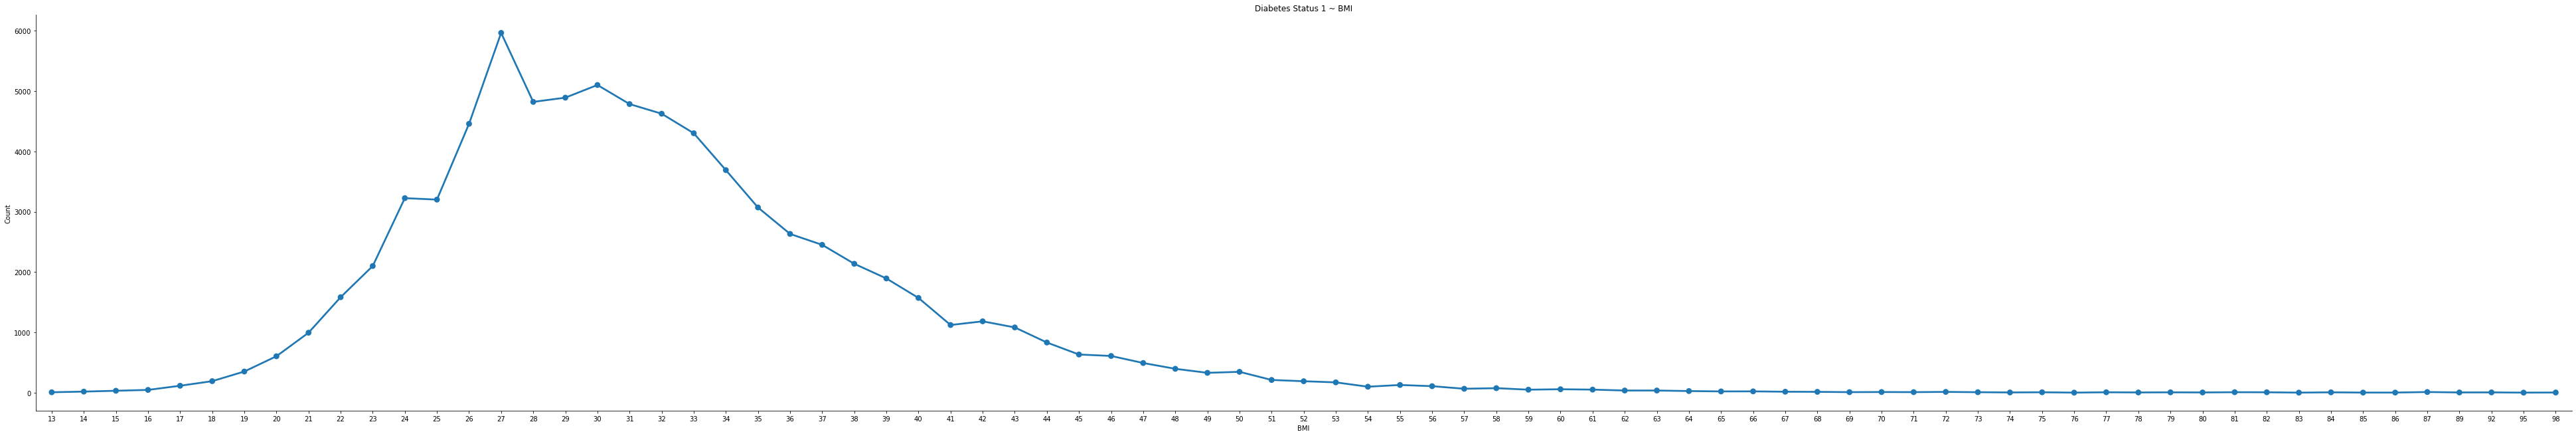

In [63]:
# plt.figure(figsize = (8,6),dpi=100)
sns.factorplot(x = 'BMI', y = 'Count' ,data = diabetes_BMI1,height=9,aspect=6)
plt.title("Diabetes Status 1 ~ BMI")
plt.show()

In [92]:
temp0 = diabetes_BMI0
temp1 = diabetes_BMI1
temp = temp0.merge(temp1, on='BMI', how='outer')
temp = temp.fillna(0)

In [93]:
temp

,BMI,Count,Count_
0,12,2.0,0.0
1,13,6.0,7.0
2,14,20.0,18.0
3,15,44.0,32.0
4,16,118.0,46.0
5,17,266.0,115.0
6,18,674.0,191.0
7,19,1350.0,351.0
8,20,2249.0,604.0
9,21,3312.0,994.0


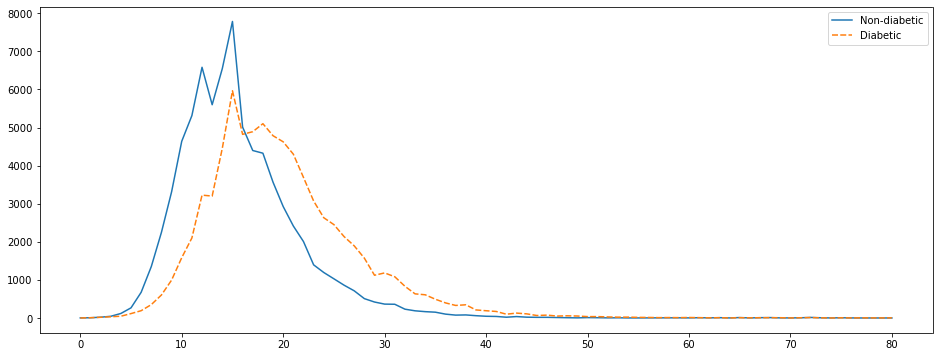

In [99]:
#combine two figures in one
x = temp['BMI']
y1 = temp['Count']
y2 = temp['Count_']
# df = pd.DataFrame(np.c_[y1, y2], index=x)
df = pd.DataFrame({"Non-diabetic":y1,"Diabetic":y2})

ax = sns.lineplot(data=df)
plt.show()

# Age - Diabetes

In [31]:
diabetes_Age0 = dbt_data0.groupby(['Age']).size().reset_index(name = 'Count')
temp0 = diabetes_Age0
temp0['Age'] = temp0['Age'].replace({1:'18-24',2:'25-29',3:'30-34',4:'35-39',5:'40-44',6:'45-49',7:'50-54',8:'55-59',9:'60-64',10:'65-69',11:'70-74',12:'75-79',13:'>=80'})
print(temp0)

      Age  Count
0   18-24   1969
1   25-29   2645
2   30-34   3888
3   35-39   4767
4   40-44   5611
5   45-49   6557
6   50-54   8360
7   55-59   9525
8   60-64   9542
9   65-69   8503
10  70-74   6318
11  75-79   4492
12   >=80   5216


/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

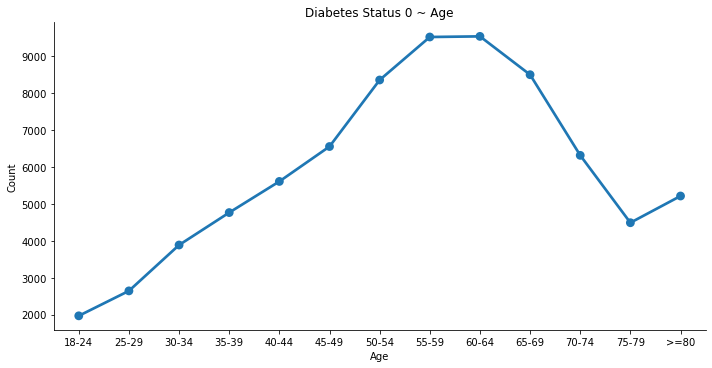

In [56]:
plt.figure(figsize = (16,8))
sns.factorplot(x = 'Age', y = 'Count' ,data = temp0,size=5,aspect=2)
plt.title("Diabetes Status 0 ~ Age")
plt.show()

In [58]:
diabetes_Age1 = dbt_data1.groupby(['Age']).size().reset_index(name = 'Count')
temp1 = diabetes_Age1
temp1['Age'] = temp1['Age'].replace({1:'18-24',2:'25-29',3:'30-34',4:'35-39',5:'40-44',6:'45-49',7:'50-54',8:'55-59',9:'60-64',10:'65-69',11:'70-74',12:'75-79',13:'>=80'})
print(temp1)

      Age  Count
0   18-24    182
1   25-29    332
2   30-34    735
3   35-39   1333
4   40-44   2386
5   45-49   3971
6   50-54   6715
7   55-59   9573
8   60-64  12336
9   65-69  13892
10  70-74  11074
11  75-79   7479
12   >=80   7385


/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

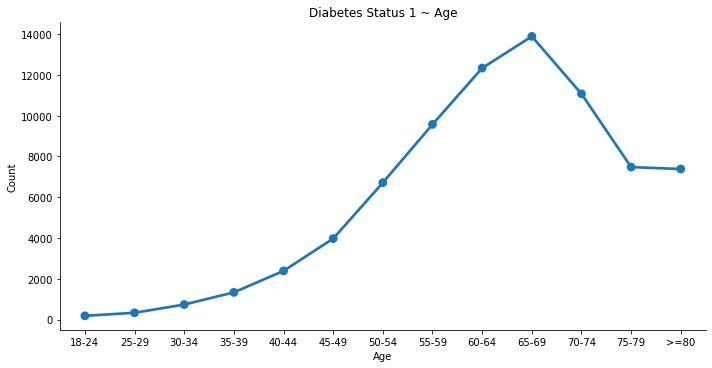

In [57]:
plt.figure(figsize = (16,8))
sns.factorplot(x = 'Age', y = 'Count' ,data = temp1,size=5,aspect=2)
plt.title("Diabetes Status 1 ~ Age")
plt.show()
# Obviously age has positive correlation with diabetes. The drop after the age group 65-69, 
# probably is because the number of the people in these age groups dropped due to other syndrome.
# Because the figure up displaying the distribution for people without diabetes, we can see there is also have a drop
# after the same age group 65-69

In [35]:
#Mean BMI of people with diabetes > mean BMI of people without diabetes, higher BMI has more risk have diabetes
#With the age growing the risk of diabetes will be higher
diabetes_BMI_age = dbt_data.groupby(['Diabetes_01'])['BMI','Age'].describe()
print(diabetes_BMI_age)

                 BMI                                                     \
               count       mean       std   min   25%   50%   75%   max   
Diabetes_01                                                               
0            77393.0  27.667851  5.999196  12.0  24.0  27.0  30.0  95.0   
1            77393.0  31.869885  7.300110  13.0  27.0  31.0  35.0  98.0   

                 Age                                                  
               count      mean       std  min  25%   50%   75%   max  
Diabetes_01                                                           
0            77393.0  7.781401  3.111467  1.0  6.0   8.0  10.0  13.0  
1            77393.0  9.370860  2.360058  1.0  8.0  10.0  11.0  13.0  


/home/xavior/anaconda3/envs/project36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
